# Audio with Python - advanced

## Contents
1. Resampy - change the sample rate
2. Plotting a spectrogram with matplotlib
3. SciPy Wavfile
4. Librosa
5. Filter audio
6. pyloudnorm

## 1. Resampy - change the sample rate

In [14]:
#only used for demonstration perposes
%pip install resampy

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#only'


In [13]:
import librosa
import resampy

# Load in librosa's example audio file at its native sampling rate
x, sr_orig = librosa.load(librosa.util.example_audio_file(), sr=None)

# x is now a 1-d numpy array, with `sr_orig` audio samples per second

# We can resample this to any sampling rate we like, say 16000 Hz
y_low = resampy.resample(x, sr_orig, 16000)

# That's it!

In [15]:
type(x)

numpy.ndarray

In [16]:
type(y_low)

numpy.ndarray

In [17]:
x

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [18]:
y_low

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

## 2. Plotting a spectogram with matplotlib

<IPython.core.display.Javascript object>


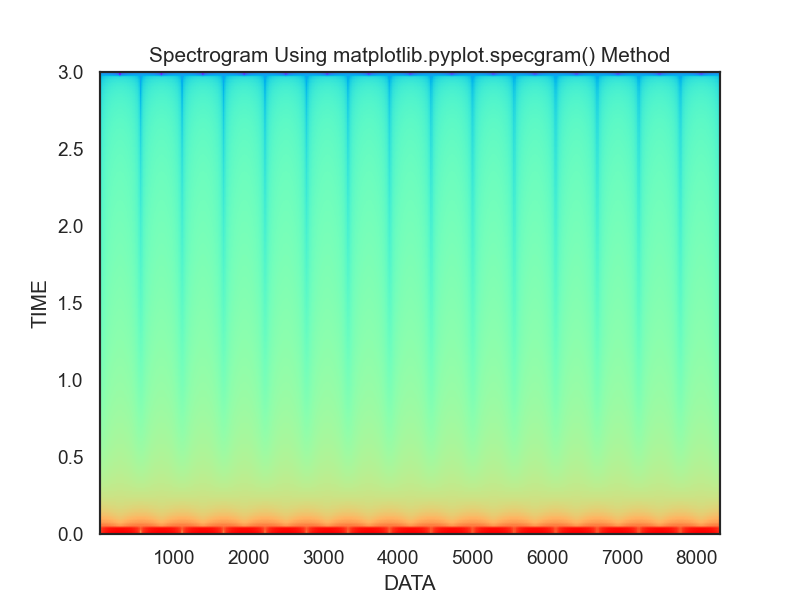

In [25]:
%matplotlib notebook
# Importing libraries using import keyword.
import math
import numpy as np
import matplotlib.pyplot as plt

# Set the time difference to take picture of
# the the generated signal.
Time_difference = 0.0001

# Generating an array of values
Time_Array = np.linspace(0, 5, math.ceil(5 / Time_difference))

# Actual data array which needs to be plot
Data = 20*(np.sin(3 * np.pi * Time_Array))

# Matplotlib.pyplot.specgram() function to
# generate spectrogram
plt.specgram(Data, Fs=6, cmap="rainbow")

# Set the title of the plot, xlabel and ylabel
# and display using show() function
plt.title('Spectrogram Using matplotlib.pyplot.specgram() Method')
plt.xlabel("DATA")
plt.ylabel("TIME")
plt.show()


## 3. Scipy wavfile

<IPython.core.display.Javascript object>


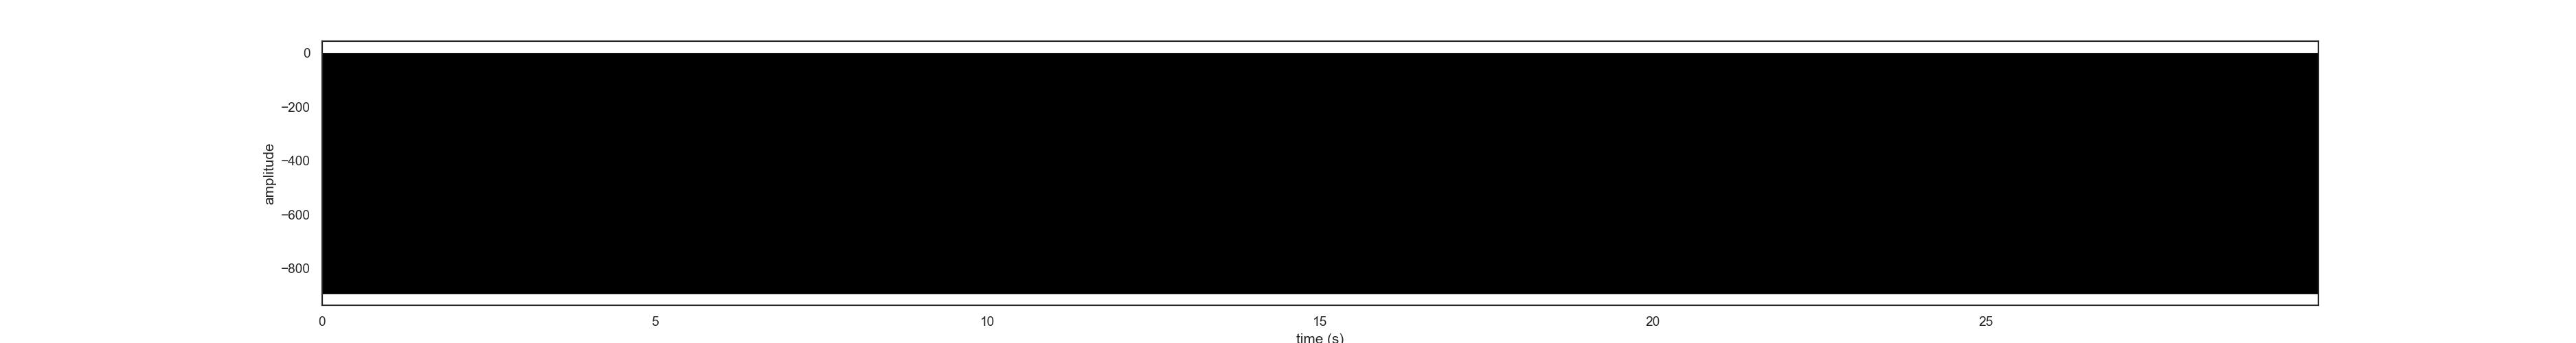

In [26]:
#source:https://gist.github.com/leouieda/9043213 #NOT WORKING
# Load the required libraries:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

# Load the data and calculate the time of each sample
samplerate, data = wavfile.read('oe_wavs/record_1630520971.wav')
times = np.arange(len(data))/float(samplerate)

# Make the plot
# You can tweak the figsize (width, height) in inches
plt.figure(figsize=(30, 4))
plt.fill_between(times, data[0], color='k') # data[:,1],
plt.xlim(times[0], times[-1])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
plt.savefig('plot.png', dpi=100)
plt.show()

In [ ]:
#source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

In [22]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io

In [25]:
data_dir = pjoin(dirname(scipy.io.__file__), 'tests', 'data')
wav_fname =  pjoin('oe_wavs/record_1630520971.wav')#works partly with 'out.wav' BROKE IT!

In [19]:
# 32-bit integer PCM => numpy dtype = int32
# 24-bit integer PCM = int32
# 16-bit integer PCM = int16
#  8-bit integer PCM = uint8

from scipy.io import wavfile
data = wavfile.read('test.wav')
data

(8000, array([128, 128, 128, ..., 127, 127, 127], dtype=uint8))

In [26]:
samplerate, data = wavfile.read(wav_fname)
print(f"number of channels = {data.shape[1]}")

IndexError: tuple index out of range

In [18]:
length = data.shape[0] / samplerate
print(f"length = {length}s")

length = 0.01s


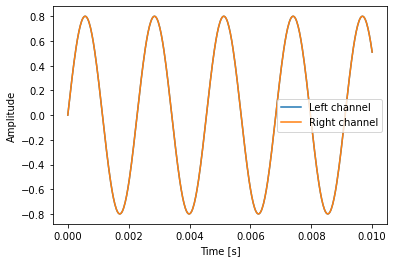

In [19]:
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

### 4b. SciPy for out.wav

In [58]:
from scipy.io import wavfile
samplerate, data = wavfile.read('oe_wavs/record_1630520821.wav') #test2 and test3
print(samplerate)
#print(data.shape)
print(data.shape[0])

16000
480000


In [59]:
length = data.shape[0] / samplerate
print(f"length = {length}s")

length = 30.0s


In [60]:
type(data)

numpy.ndarray

In [61]:
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [10]:
import wave, struct

wavefile = wave.open('out.wav', 'r')

length = wavefile.getnframes()
for i in range(0, length):
    wavedata = wavefile.readframes(1)
    data = struct.unpack("<h", wavedata)
    print(int(data[0]))

0
0
0
0
0
-1
0
1
-21
-34
-30
-30
-29
-33
-33
-30
-40
-38
-33
-36
-36
-36
-38
-35
-32
-32
-32
-32
-28
-27
-27
-26
-30
-28
-21
-18
-18
-15
-10
-7
-6
-4
-1
4
5
7
12
15
15
19
29
32
33
35
35
38
40
42
47
46
45
54
56
56
60
62
62
58
61
63
64
64
60
63
67
63
67
72
72
71
67
66
70
72
68
64
65
64
61
61
65
62
64
67
67
68
73
78
79
81
81
86
90
88
83
82
91
100
101
96
99
109
111
108
115
114
101
102
110
116
118
122
129
127
135
145
147
157
155
144
144
146
147
152
146
136
134
138
144
146
149
152
154
155
146
144
146
149
153
149
148
151
154
148
134
125
122
126
131
125
118
117
121
122
125
126
131
138
135
138
139
132
125
120
114
112
112
103
102
108
110
110
112
113
110
101
99
104
107
114
112
108
112
111
106
101
93
95
95
89
81
74
75
75
79
88
91
90
96
96
92
96
98
95
96
100
94
90
87
89
90
93
101
109
114
113
107
102
101
96
91
84
79
84
84
83
87
89
86
86
88
85
82
81
79
78
76
67
63
63
61
62
62
59
63
64
61
55
51
50
50
51
55
63
65
70
71
68
66
63
65
69
67
66
68
68
74
78
81
87
90
95
95
95
96
94
98
98
97
99
98
98
96
92
87


2
6
6
4
4
5
4
7
7
5
7
6
2
0
1
5
4
3
3
5
8
5
3
5
7
6
5
7
5
5
7
7
8
10
9
9
9
7
6
8
7
5
7
5
3
7
10
9
11
9
7
6
7
6
5
6
8
9
7
9
11
9
7
6
6
7
8
7
9
13
9
7
8
9
8
8
10
12
10
11
12
11
12
10
9
8
7
11
16
16
14
13
10
11
16
15
13
11
8
9
11
10
8
9
8
8
11
14
10
8
11
10
7
4
5
7
7
8
8
5
6
4
5
5
2
6
9
6
5
7
10
7
5
6
4
3
5
1
-1
1
2
0
3
6
4
4
1
-1
3
3
2
3
3
3
2
4
7
6
2
3
5
4
1
0
2
3
3
0
2
7
4
5
5
6
7
5
3
6
8
2
-1
5
9
5
0
3
4
3
5
4
5
8
4
0
2
3
0
2
4
3
3
5
2
6
7
3
2
3
4
1
-1
-2
-2
3
4
5
4
1
1
4
3
-3
-4
-3
1
0
-1
2
-1
1
1
-1
2
2
0
-4
-6
-3
-2
-3
-1
-1
-3
-1
-2
-4
-1
-4
-5
-3
-2
0
-1
-2
-1
-3
-8
-5
-2
-8
-9
-4
-1
-2
-5
-6
-4
-4
-4
-7
-11
-5
-4
-7
-9
-8
-8
-11
-14
-13
-10
-10
-10
-10
-12
-10
-6
-6
-6
-5
-7
-8
-8
-9
-11
-13
-9
-6
-9
-9
-6
-8
-11
-10
-11
-10
-12
-17
-15
-14
-17
-14
-9
-10
-10
-11
-12
-11
-12
-16
-18
-14
-12
-13
-12
-13
-17
-17
-14
-15
-17
-16
-17
-20
-19
-17
-20
-19
-17
-18
-19
-18
-17
-19
-23
-22
-20
-19
-19
-21
-19
-17
-20
-23
-20
-21
-21
-23
-27
-25
-24
-22
-25
-26
-24
-23
-24
-26
-21
-19
-20

-27
-35
-34
-29
-32
-34
-34
-34
-33
-32
-33
-29
-33
-40
-34
-33
-26
-29
-36
-33
-34
-33
-28
-30
-28
-31
-40
-41
-36
-29
-35
-39
-34
-36
-33
-30
-33
-34
-38
-43
-39
-34
-39
-40
-38
-42
-43
-36
-36
-38
-36
-46
-49
-36
-34
-41
-42
-42
-47
-45
-40
-41
-40
-45
-51
-47
-45
-48
-47
-49
-49
-43
-44
-47
-51
-49
-49
-53
-50
-48
-45
-47
-54
-52
-48
-48
-49
-48
-47
-47
-50
-52
-45
-44
-43
-47
-50
-47
-51
-53
-48
-46
-44
-45
-50
-46
-42
-51
-49
-42
-44
-43
-42
-52
-51
-43
-47
-45
-43
-47
-47
-49
-52
-51
-48
-53
-56
-50
-47
-46
-47
-53
-53
-52
-53
-46
-45
-49
-50
-59
-57
-53
-58
-58
-56
-58
-58
-54
-58
-61
-61
-59
-60
-62
-60
-62
-62
-60
-57
-57
-65
-66
-64
-61
-59
-63
-64
-66
-66
-63
-64
-64
-64
-65
-59
-62
-65
-59
-62
-68
-61
-50
-60
-66
-58
-60
-59
-60
-65
-60
-57
-64
-62
-56
-53
-54
-59
-59
-61
-57
-51
-53
-56
-56
-59
-58
-55
-58
-62
-61
-55
-53
-62
-62
-56
-52
-50
-54
-55
-57
-57
-49
-53
-61
-56
-54
-58
-58
-58
-60
-55
-56
-61
-57
-52
-56
-64
-65
-59
-55
-58
-55
-56
-61
-60
-56
-54
-55
-59
-68


54
53
52
53
56
54
52
51
50
50
49
49
51
48
46
47
49
49
47
48
48
47
47
47
47
46
45
44
46
45
41
42
43
43
44
44
45
42
42
45
45
42
43
44
40
40
42
43
45
43
44
44
45
49
48
46
48
47
46
45
45
45
44
43
43
44
47
50
49
47
47
48
46
45
45
45
47
44
44
46
47
47
45
42
43
45
44
45
49
51
49
52
55
51
48
49
49
49
48
49
51
51
50
50
50
50
52
50
50
50
50
49
50
49
47
47
47
44
44
45
45
43
44
46
46
47
45
44
42
40
42
42
41
41
42
42
42
41
42
43
39
36
38
39
39
40
39
38
40
40
40
41
39
39
43
41
39
41
43
41
40
42
42
41
43
41
39
40
41
38
37
38
39
40
39
39
41
42
40
39
42
45
44
40
39
36
35
39
40
38
41
44
45
45
43
42
40
38
39
40
39
35
37
41
43
42
37
37
39
38
35
35
37
39
39
39
41
42
44
42
41
40
40
40
39
38
39
40
38
39
41
41
38
36
36
35
36
37
37
33
33
34
31
28
29
30
27
27
27
28
29
25
21
22
21
21
23
26
27
24
25
25
23
23
21
19
21
23
26
26
24
26
27
26
25
23
24
25
24
24
25
26
26
28
30
31
30
32
32
29
27
26
25
22
24
27
26
24
25
26
26
24
22
24
23
20
19
20
22
21
21
23
26
27
24
23
21
20
21
18
15
18
21
20
22
25
26
26
24
23
21
20
18
1

147
143
147
134
108
103
104
95
105
115
105
96
87
83
94
123
138
145
161
172
186
204
205
191
185
195
208
212
225
246
250
245
252
250
234
238
258
272
290
312
328
335
340
340
347
363
368
372
379
395
419
421
419
425
409
408
425
415
394
382
374
361
339
316
295
287
283
260
236
234
246
245
210
169
150
152
166
156
133
122
129
156
175
175
172
173
161
129
106
101
103
98
101
118
117
112
98
71
62
69
68
50
37
38
49
65
59
37
34
59
65
53
44
33
30
31
37
42
50
61
60
50
48
51
58
54
32
28
24
6
-16
-39
-42
-25
-9
-6
-2
15
19
12
7
7
11
14
23
38
40
52
79
97
96
96
100
94
99
114
130
134
133
152
156
144
136
117
107
102
94
98
99
88
85
88
91
69
49
60
66
72
73
70
60
55
54
34
19
20
17
12
-5
-14
-28
-63
-68
-57
-70
-91
-109
-97
-68
-58
-39
-9
13
20
12
0
-6
-22
-22
-9
-8
-12
-26
-40
-57
-78
-85
-84
-90
-101
-118
-130
-134
-135
-133
-130
-111
-92
-92
-92
-81
-78
-84
-91
-103
-137
-173
-197
-203
-188
-174
-168
-171
-188
-217
-220
-203
-199
-188
-178
-189
-210
-216
-215
-198
-172
-152
-133
-121
-110
-98
-99
-111
-120
-1

-35
-30
-17
-22
-34
-35
-29
-24
-29
-32
-26
-20
-24
-32
-33
-29
-28
-33
-45
-47
-46
-52
-53
-48
-42
-42
-37
-24
-22
-33
-34
-38
-48
-47
-41
-42
-35
-16
-10
-19
-27
-28
-37
-41
-35
-40
-45
-33
-24
-26
-31
-34
-30
-37
-32
-29
-43
-38
-27
-33
-35
-37
-42
-33
-17
-23
-35
-29
-14
-13
-19
-18
-20
-25
-26
-32
-48
-48
-31
-24
-21
-15
-16
-18
-24
-38
-44
-37
-30
-24
-14
-8
0
6
1
-13
-23
-28
-29
-29
-34
-29
-18
-25
-42
-52
-60
-63
-61
-56
-46
-36
-25
-12
-13
-27
-37
-37
-36
-40
-31
-36
-49
-42
-35
-37
-36
-33
-34
-36
-44
-52
-58
-59
-39
-17
-20
-32
-36
-29
-30
-41
-44
-44
-36
-22
-19
-23
-22
-21
-14
-14
-30
-38
-42
-40
-37
-31
-22
-25
-34
-22
-2
-20
-43
-40
-29
-29
-31
-28
-30
-26
-13
-16
-33
-41
-36
-32
-36
-43
-48
-43
-35
-31
-26
-22
-31
-37
-23
-17
-27
-31
-23
-18
-21
-29
-41
-44
-35
-33
-43
-46
-40
-37
-42
-49
-54
-57
-57
-52
-43
-41
-40
-26
-14
-19
-34
-35
-36
-46
-49
-53
-63
-58
-44
-48
-51
-44
-47
-51
-49
-46
-43
-37
-33
-36
-34
-26
-32
-43
-42
-46
-53
-49
-45
-43
-38
-25
-25
-43
-47
-38


-5
-1
0
-2
-3
-4
-2
-2
-2
-1
4
8
-1
-2
0
0
3
0
0
4
5
1
-4
1
3
2
4
2
1
0
2
2
0
-1
-2
1
-2
-2
0
-3
-1
-7
-6
-6
-9
-6
-7
-4
-5
-8
-11
-11
-11
-12
-12
-12
-12
-15
-13
-12
-10
-7
-7
-11
-15
-10
-9
-12
-12
-17
-14
-12
-13
-14
-15
-15
-13
-8
-8
-12
-13
-14
-12
-14
-16
-15
-13
-8
-11
-12
-14
-11
-9
-16
-12
-12
-17
-13
-11
-12
-10
-12
-13
-16
-18
-12
-9
-5
-8
-8
-10
-10
-13
-13
-4
-7
-6
-8
-5
-6
-9
-10
-6
-7
-6
-2
-6
-3
-6
-9
-9
-5
-6
-6
-5
-7
-5
-4
0
-2
-6
-4
1
0
-3
3
-1
-2
-2
-3
-6
-4
3
4
-1
-4
-4
-9
0
-6
-6
1
2
2
-3
1
0
-2
-2
-2
-6
-4
-5
-4
-4
-3
-6
-10
-6
-8
-7
-5
-3
-2
-1
0
-5
-2
4
4
-2
-6
-7
-4
-3
-3
-5
-3
-8
-5
1
-3
-2
-7
-4
-2
-5
-2
-1
-2
0
0
-4
-7
-7
-2
-1
1
3
-5
1
4
0
3
3
3
5
3
3
7
1
10
11
2
5
5
8
6
8
7
5
10
8
7
8
8
3
3
8
12
8
8
12
5
-2
3
8
5
6
2
6
8
10
4
3
10
12
14
14
12
10
13
13
13
13
11
11
12
15
12
7
8
12
18
17
14
12
14
15
15
14
17
18
12
8
8
15
15
12
16
16
14
12
9
12
7
14
19
19
24
20
18
12
17
22
20
16
17
19
16
22
24
17
19
14
20
21
19
24
19
25
21
21
16
20
25
20
24
20
23
20
19
22
25


3051
3046
3150
2659
1731
985
693
109
-961
-1501
-1433
-1279
-1338
-1301
-604
464
1485
2328
2839
3435
4411
5237
5237
4587
4454
4697
4257
3260
2597
2515
2285
1622
1219
1289
1465
1388
1002
890
1126
1220
936
580
473
505
441
357
333
247
289
467
598
616
520
358
183
-8
-141
-414
-1077
-1704
-1905
-1794
-1995
-2429
-2511
-2437
-2158
-2096
-2573
-2262
-1775
-2390
-3436
-3665
-3415
-4382
-5146
-4142
-4022
-5864
-5861
-3243
-1864
-3706
-4122
-853
1706
1424
1281
3244
4702
4647
5066
5721
4798
3486
3132
2862
1122
-819
-1344
-1813
-3117
-4186
-4141
-3640
-3474
-3578
-3100
-2066
-910
-109
515
984
1548
2618
3607
3684
3349
3812
4713
4869
4210
3935
3956
3557
2766
2244
1899
1065
10
-450
-554
-685
-714
-630
-341
200
1090
2007
2569
3033
3637
4158
4523
4639
4648
4428
4027
3784
3631
3338
2879
2488
2255
1981
1697
1636
1431
1047
651
500
568
516
270
54
77
338
543
473
460
437
555
610
373
-89
-631
-841
-925
-1272
-1603
-1820
-2045
-2088
-1836
-1542
-1622
-1828
-1832
-2149
-2466
-2905
-3672
-4142
-4994
-5514
-5520


4031
5102
5658
5455
4776
4332
4190
3424
1939
212
-788
-1110
-1690
-2610
-3541
-4134
-4045
-3968
-4043
-3970
-3794
-3547
-3394
-3150
-2534
-1533
-266
699
1350
2478
4273
6082
7120
7505
7935
8280
8163
7643
6781
5572
4116
2668
1384
331
-225
-413
-768
-1208
-1272
-568
305
587
504
664
972
1009
929
1003
1013
883
853
998
1280
1744
2190
2193
1876
1772
1958
2029
1575
762
196
-154
-451
-799
-1230
-1520
-1789
-1948
-2063
-2398
-2450
-2430
-2993
-3903
-4525
-4737
-5025
-5966
-6781
-7306
-7635
-7432
-7410
-7537
-7332
-6967
-6276
-5679
-5112
-4365
-2555
255
1876
1983
2640
5014
7524
8578
7633
6561
6686
7075
5837
3656
2318
1385
74
-1297
-2728
-3443
-3376
-3775
-4978
-5964
-5750
-5313
-5014
-5012
-5431
-5732
-4994
-3804
-2802
-2207
-1761
-819
760
2230
2949
3622
4769
5594
5541
5114
4826
4832
4299
2833
1043
-12
-291
-700
-1760
-2908
-3498
-3549
-3571
-3753
-3881
-3869
-3676
-3414
-3224
-2661
-1603
-497
310
958
1989
3488
5160
6276
6721
7114
7656
7824
7603
7015
6007
4865
3787
2640
1578
1007
774
236
-401
-59

-969
-198
423
999
1574
1993
2259
2397
2314
2054
1710
1242
701
218
-210
-691
-1257
-1747
-2153
-2449
-2657
-2896
-3227
-3544
-3817
-4034
-4299
-4632
-5034
-5441
-5779
-6098
-6400
-6588
-6655
-6643
-6590
-6446
-6110
-5635
-5051
-4420
-3820
-3219
-2542
-1823
-1150
-596
-120
267
563
808
1007
1137
1226
1332
1460
1607
1777
1995
2241
2495
2712
2858
3042
3244
3305
3232
3065
2810
2484
2110
1736
1323
880
528
256
73
10
65
249
489
795
1149
1509
1912
2253
2501
2687
2782
2792
2735
2606
2409
2115
1840
1616
1354
1141
1010
922
868
832
883
963
1050
1138
1165
1194
1158
1049
894
677
397
82
-304
-695
-1109
-1464
-1716
-1972
-2231
-2476
-2591
-2598
-2722
-2906
-3062
-3212
-3332
-3561
-3824
-4112
-4368
-4582
-4783
-4818
-4644
-4507
-4328
-4037
-3595
-3076
-2546
-1965
-1404
-946
-598
-386
-177
-4
-42
-224
-459
-680
-970
-1340
-1678
-1999
-2348
-2625
-2829
-2928
-2951
-2941
-2913
-2917
-2885
-2771
-2718
-2705
-2706
-2779
-2909
-3070
-3197
-3302
-3409
-3475
-3529
-3504
-3309
-3073
-2758
-2326
-1847
-1351
-858
-

-15
-6
-2
2
9
17
22
20
11
3
0
1
5
7
8
16
27
33
44
54
49
36
27
23
19
14
5
-6
-15
-19
-23
-19
-16
-24
-31
-25
-18
-10
0
2
2
1
-9
-11
-4
-10
-29
-36
-26
-16
-4
5
11
22
28
33
43
48
36
26
23
24
28
24
15
13
16
20
28
30
19
9
5
5
10
15
17
15
9
-3
-4
0
-6
-13
-16
-18
-19
-19
-11
3
10
14
17
17
12
2
-2
-6
-13
-12
-10
-14
-12
-7
-2
4
2
-8
-9
0
-1
-2
-2
-4
-3
-10
-19
-22
-22
-32
-52
-51
-43
-47
-44
-33
-20
-17
-26
-26
-23
-30
-39
-46
-55
-68
-78
-76
-69
-64
-61
-63
-60
-62
-68
-67
-59
-52
-51
-45
-33
-32
-36
-41
-46
-44
-54
-63
-54
-46
-40
-31
-18
0
2
3
7
6
-1
-14
-15
-8
-12
-17
-23
-32
-29
-26
-27
-27
-33
-46
-53
-48
-47
-49
-52
-55
-51
-49
-56
-65
-68
-76
-74
-56
-47
-39
-25
-15
-7
0
1
-2
-5
-11
-19
-20
-19
-16
-14
-18
-23
-21
-11
-4
-11
-21
-22
-23
-30
-31
-29
-31
-31
-39
-47
-41
-43
-55
-67
-66
-48
-37
-37
-27
-15
-11
-7
-6
-6
-7
-21
-32
-32
-26
-17
-13
-17
-24
-26
-17
-10
-15
-24
-25
-18
-15
-18
-16
-11
-11
-27
-37
-37
-44
-55
-63
-59
-48
-47
-46
-40
-28
-22
-29
-35
-40
-46
-51
-56
-55
-56
-59

-30
-35
-52
-55
-50
-55
-76
-53
-30
-63
-68
-50
-49
-49
-65
-53
-49
-43
-47
-66
-45
-30
-25
-41
-38
-18
-36
-46
-38
-14
-6
-24
-28
-37
-25
16
-11
-35
-44
-40
-19
-32
-52
-50
-29
-38
-51
-44
-64
-66
-36
-31
-44
-20
-24
-58
-36
-40
-55
-29
-20
-40
-63
-55
-27
-11
-36
-32
2
-17
-16
-20
-30
-12
-8
-6
-15
-30
-23
-23
-31
-42
-41
-30
-36
-38
-38
-32
-12
-8
-30
-31
-11
-7
-27
-39
-8
-11
-33
-36
0
7
-33
-24
0
-10
-31
-1
-4
-33
-24
-24
-29
-40
-35
-27
-46
-60
-50
-22
-17
-55
-53
-20
-9
-12
-34
-30
-3
-18
-9
-6
-29
-5
5
-18
-21
-13
-8
7
7
2
-3
0
8
-9
-17
-18
-11
5
-23
-42
-32
-6
-20
-48
4
-18
-41
-16
-16
-6
8
-18
-24
-6
-11
-2
-11
-17
-18
-15
-9
8
22
-5
-5
28
11
4
6
-7
8
-3
3
2
-25
-24
-8
3
-19
-8
-3
-37
4
12
-2
24
9
-11
15
15
6
-12
-14
9
-6
-7
4
16
1
3
11
-10
6
3
-22
-7
-13
-25
-19
-15
-28
-33
-18
-25
-12
-3
-37
-18
-6
-11
6
8
2
3
1
17
30
5
-8
19
2
6
39
5
-14
22
9
5
29
-10
-9
9
-20
-7
6
-25
-27
-16
-15
-5
-16
8
-3
-27
17
17
-21
-2
-3
-12
7
-14
27
3
-41
-20
-15
9
-10
-28
-26
-15
-10
-10
-15
-21


49
86
71
65
83
80
43
38
108
123
97
81
70
101
106
81
82
79
31
31
54
42
7
-9
19
31
19
-19
19
91
96
68
38
72
116
128
121
85
75
89
94
67
45
42
30
47
47
18
18
29
41
41
36
48
30
10
36
31
-17
-25
-5
15
36
23
16
50
75
87
101
122
118
84
111
136
75
6
26
56
-5
-60
-67
-26
26
-11
-16
41
56
53
39
61
46
10
10
4
15
9
-15
4
67
54
22
56
99
124
108
86
76
68
41
34
17
-24
-54
-63
-23
-16
-27
9
45
50
61
74
42
27
50
44
2
-3
23
24
44
69
40
24
74
129
129
116
102
68
79
87
31
-30
-45
-36
-37
-53
-72
-55
20
50
34
69
85
78
80
77
67
34
17
14
3
25
28
9
29
52
84
117
107
100
111
111
88
36
-14
-31
-26
-21
-76
-114
-75
-15
36
41
57
82
93
118
128
107
90
54
13
12
17
2
-8
11
12
20
48
63
97
126
136
114
70
52
45
34
-2
-54
-67
-77
-86
-51
-9
26
57
70
111
127
125
139
103
78
62
38
26
11
19
15
-19
-22
-6
24
103
112
61
81
99
87
54
-4
-12
4
-32
-73
-73
-58
-31
16
68
76
65
100
144
117
79
84
72
60
43
-6
-17
2
-2
-30
-11
28
38
72
102
100
93
71
26
14
28
18
-29
-74
-62
-34
-11
7
26
90
111
86
107
126
108
94
95
68
8
-17
-8
6
-7
-33
-19


11
14
-30
-57
-26
-5
-9
-4
3
23
19
-29
-17
23
-6
-25
10
25
10
12
24
24
2
-41
-54
-34
-31
-34
-16
0
-7
0
25
39
53
45
-5
-51
-65
-63
-47
-23
9
42
23
-26
-20
-5
-19
2
36
43
35
14
3
12
6
-21
-35
-40
-58
-72
-53
-22
-8
10
33
52
67
64
28
-19
-48
-69
-82
-61
-10
17
-8
-34
-35
-34
-19
22
63
71
38
6
6
13
9
12
19
-13
-70
-97
-98
-79
-36
17
50
59
61
57
32
9
11
-2
-29
-32
-24
-21
-37
-62
-53
-21
-3
17
55
55
18
3
14
32
44
53
46
-10
-80
-109
-104
-92
-51
15
39
27
20
15
3
4
23
30
29
11
-31
-58
-73
-75
-48
-12
6
7
6
-7
-20
-4
25
51
69
72
47
-15
-71
-84
-70
-54
-21
7
-15
-37
-35
-34
-14
20
36
39
35
7
-21
-21
-27
-23
6
13
0
-12
-27
-35
-20
1
28
55
52
37
21
-11
-35
-34
-16
4
15
2
-26
-43
-51
-43
-10
16
18
17
5
-27
-37
-17
11
37
43
20
-11
-25
-30
-4
43
55
54
47
8
-22
-22
-7
4
8
14
21
18
-2
-17
-7
-2
-9
2
10
-1
-7
-16
-25
-9
7
19
41
41
8
-24
-33
-27
-1
46
72
68
46
10
-22
-28
-2
28
38
22
-8
-23
-27
-20
2
19
18
3
-20
-40
-33
-11
9
34
40
23
3
-11
-10
-15
-18
-1
15
28
38
43
39
14
-5
-5
15
44
51
31
-5
-22
-19
2

18
19
21
25
29
33
28
20
15
11
11
11
14
11
3
2
2
1
0
0
-2
-9
-15
-22
-30
-30
-25
-21
-14
-8
-3
2
2
0
2
1
5
12
9
9
8
5
1
-1
-1
0
1
0
-3
-7
-7
-6
-7
-8
-14
-18
-20
-27
-30
-30
-27
-24
-21
-19
-16
-12
-10
-2
5
6
10
16
21
21
19
18
17
18
17
17
17
17
20
20
20
20
15
13
9
3
-5
-13
-13
-10
-12
-18
-21
-27
-33
-33
-32
-30
-25
-18
-13
-13
-12
-6
-1
0
3
5
2
1
2
3
7
11
15
20
16
9
2
-4
-8
-8
-5
-5
-8
-14
-20
-28
-40
-44
-40
-36
-36
-36
-36
-37
-34
-32
-26
-16
-11
-10
-11
-12
-11
-7
1
8
15
18
13
7
4
-1
-5
-2
2
4
1
-9
-19
-23
-29
-31
-29
-26
-28
-31
-37
-43
-45
-41
-32
-25
-24
-26
-26
-27
-28
-22
-13
-6
0
0
-3
-5
-6
-4
1
4
7
4
0
-4
-9
-14
-14
-12
-14
-18
-23
-32
-40
-43
-44
-42
-41
-44
-44
-45
-51
-52
-47
-39
-32
-28
-27
-31
-33
-31
-30
-26
-22
-22
-21
-20
-25
-26
-25
-24
-20
-22
-22
-25
-32
-36
-39
-44
-49
-48
-46
-49
-53
-55
-55
-54
-50
-46
-40
-37
-37
-38
-40
-40
-37
-34
-31
-31
-34
-35
-34
-31
-24
-23
-23
-20
-18
-18
-21
-21
-22
-25
-26
-28
-33
-37
-38
-40
-40
-40
-40
-36
-33
-34
-35
-32
-28
-28
-3

26
23
34
35
21
18
5
-22
-18
-3
-20
-41
-32
-18
-20
1
26
7
-9
13
18
1
-1
4
-1
-12
-17
-21
-27
-37
-45
-35
-25
-29
-26
-10
2
11
22
20
10
24
32
12
-12
-30
-37
-22
-17
-37
-56
-60
-53
-36
-17
-18
-17
12
34
16
4
3
-18
-30
-31
-46
-59
-43
-25
-24
-10
14
30
43
57
54
38
36
31
9
-10
-17
-33
-60
-78
-85
-84
-66
-25
14
20
21
34
42
39
26
2
-39
-63
-54
-43
-45
-54
-52
-33
5
36
26
11
26
51
49
17
-14
-33
-44
-51
-80
-125
-146
-107
-39
-15
-28
-26
0
34
60
57
17
-30
-44
-28
-23
-36
-59
-83
-75
-36
-12
-18
-30
-11
37
52
27
0
-12
-20
-25
-48
-99
-135
-120
-76
-54
-66
-69
-43
5
67
87
52
13
4
25
37
17
-22
-62
-78
-66
-48
-50
-59
-48
-3
45
59
48
35
30
37
28
-14
-62
-89
-92
-76
-67
-83
-74
-9
54
74
74
74
69
72
87
73
23
-21
-51
-85
-99
-92
-98
-102
-65
-7
21
27
31
42
50
40
13
-39
-92
-115
-119
-120
-115
-101
-72
-38
-5
33
56
67
64
52
49
36
-10
-69
-115
-142
-145
-133
-127
-126
-100
-48
1
27
40
43
26
13
0
-47
-105
-137
-129
-112
-107
-107
-99
-62
-10
35
45
33
27
28
34
3
-77
-132
-142
-138
-138
-147
-153
-143
-

30
24
6
11
16
-2
-15
-8
-3
-9
-9
-14
-25
-19
-11
-21
-41
-51
-47
-35
-31
-38
-39
-30
-19
-16
-21
-16
0
0
-7
-8
-3
8
18
10
-7
-11
-1
7
5
-3
-6
-2
-1
-4
-3
-4
-23
-45
-43
-38
-42
-43
-41
-40
-31
-17
-15
-19
-13
3
9
3
-1
4
11
13
10
-5
-17
-7
5
3
-3
-5
-7
0
9
1
-6
-10
-26
-32
-25
-30
-33
-25
-19
-20
-14
-3
-5
-4
10
22
14
3
10
21
20
9
2
-5
-8
1
14
10
2
-3
1
16
14
0
-1
-2
-13
-19
-16
-17
-22
-15
-6
-2
-1
0
10
25
29
18
14
21
27
37
34
17
15
14
13
18
16
-2
-11
-6
0
3
-2
-11
-12
-9
-13
-17
-11
-8
-11
-3
4
4
10
12
17
27
11
-5
8
23
29
19
10
13
14
16
16
4
-13
-17
-13
-8
-8
-14
-13
-14
-12
-10
-16
-9
2
2
6
16
17
16
23
21
16
7
1
8
14
17
18
15
15
20
23
18
1
-3
-1
-15
-17
-13
-27
-32
-21
-14
-22
-24
-7
-1
-2
9
19
24
22
19
13
8
-1
-11
-6
3
-2
-7
4
18
11
6
16
9
-7
-7
-6
-11
-23
-35
-40
-38
-36
-37
-36
-28
-20
-12
7
21
23
30
35
25
12
8
3
-4
1
6
-3
-2
14
18
17
27
26
7
0
7
4
-12
-28
-40
-39
-32
-34
-40
-34
-19
-8
6
19
25
31
28
22
13
2
-6
-7
-6
-8
-12
-13
1
17
18
23
32
20
3
8
15
-2
-29
-41
-37
-35
-40
-39
-3

15
10
35
44
32
34
54
60
42
25
26
29
9
-3
11
1
-27
-32
-8
-6
-24
-16
-10
9
25
6
14
27
19
24
35
36
31
37
50
54
43
31
30
21
0
-8
-7
-11
-26
-51
-38
-8
-29
-50
-33
-15
4
4
-19
-4
17
-4
3
34
14
16
32
22
40
20
-7
14
-4
-27
-19
-24
-25
-40
-71
-48
-20
-41
-58
-50
-31
-7
-15
-35
-19
-9
-12
6
15
-3
8
36
32
22
-2
-8
6
-25
-48
-45
-48
-45
-54
-73
-62
-42
-58
-72
-52
-33
-13
-18
-43
-21
9
25
19
8
40
56
48
41
26
16
7
-3
-23
-35
-39
-44
-42
-49
-53
-39
-28
-36
-48
-29
-3
7
-1
-16
10
46
54
32
23
64
87
56
20
22
26
2
-27
-45
-29
-27
-54
-51
-41
-42
-32
-32
-33
-16
-3
8
10
12
30
61
76
59
65
79
80
80
47
16
17
0
-25
-46
-66
-68
-62
-68
-77
-60
-47
-54
-51
-39
-24
-11
-20
-24
13
47
49
43
51
82
94
57
28
33
22
-23
-63
-72
-81
-104
-122
-118
-107
-111
-104
-100
-105
-78
-52
-53
-64
-57
-15
34
32
4
34
81
75
35
5
16
20
-26
-77
-107
-108
-116
-147
-158
-137
-117
-116
-112
-110
-95
-49
-39
-59
-57
-9
51
42
16
60
116
109
58
30
41
43
2
-57
-81
-83
-108
-129
-139
-135
-117
-109
-104
-96
-85
-59
-44
-46
-46
-10
42
49

In [30]:
length

54000

### 4c. Scipy .io write

source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html

In [2]:
# Create a 100Hz sine wave, sampled at 44100Hz. Write to 16-bit PCM, Mono.
import numpy as np
from scipy.io.wavfile import write
samplerate = 44100; fs = 100
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
write("example.wav", samplerate, data.astype(np.int16))

In [3]:
from IPython import display
display.Audio('example.wav')

### 4d. Spectogram with SciPy

In [15]:
import glob
wav_files = glob.glob('*.wav')
print(wav_files)

['11k16bitpcm.wav', 'claxon_1m.wav', 'claxon_close.wav', 'claxon_freesound.wav', 'claxon_iphone.wav', 'claxon_michiel.wav', 'example.wav', 'loudness.wav', 'my_test.wav', 'my_wav.wav', 'noise_add.wav', 'out.wav', 'output.wav', 'robot0.wav', 'robot1.wav', 'robot2.wav', 'robot3.wav', 'silence.wav', 'test.wav', 'test2.wav', 'test3.wav']


<ipython-input-71-f7bdbadebf33>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(times, frequencies, spectrogram)


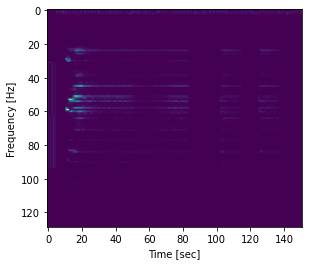

In [71]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('claxon_close.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## 4. Librosa
- source: https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html
- source: https://librosa.org/doc/latest/index.html

In [2]:
from glob import glob
files = glob('*.wav')
print(files)

['11k16bitpcm.wav', 'claxon_1m.wav', 'claxon_close.wav', 'claxon_freesound.wav', 'claxon_iphone.wav', 'claxon_michiel.wav', 'example.wav', 'file.wav', 'loudness.wav', 'miaow_16k.wav', 'my-audio.wav', 'my_test.wav', 'my_wav.wav', 'noise_add.wav', 'out.wav', 'output.wav', 'robot0.wav', 'robot1.wav', 'robot2.wav', 'robot3.wav', 'silence.wav', 'speech_whistling2.wav', 'test.wav', 'test2.wav', 'test3.wav', 'tone_220.wav', 'welcome.wav']


In [3]:
audio_data=files[7]
audio_data

'file.wav'

In [4]:
from IPython import display
print(audio_data)
display.Audio(audio_data)

file.wav


In [5]:
import librosa
#path = librosa.ex('oe_wavs/record_1630521181')
librosa.get_samplerate(audio_data)

22050

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [7]:
import librosa
audio_data = files[7]
x , sr = librosa.load(audio_data) #sr = sampling rate
print(type(x), type(sr))
print(sr)

<class 'numpy.ndarray'> <class 'int'>
22050


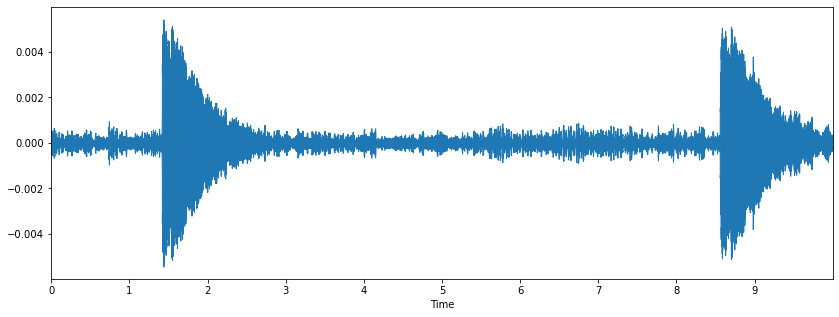

In [7]:
#creating a waveplot
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

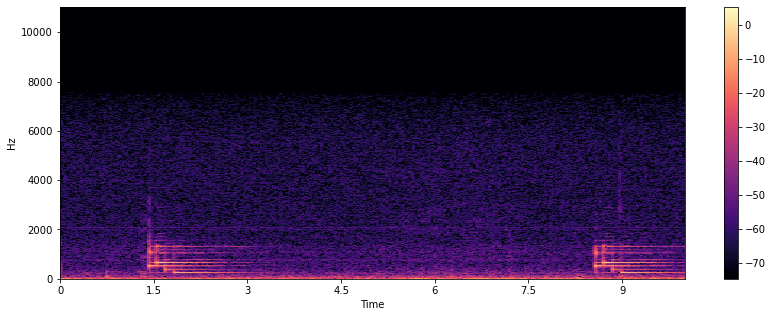

In [8]:
#creating a spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [9]:
from IPython.display import Audio
Audio('tone_220.wav')

## 5. Filter audio
source: https://medium.com/analytics-vidhya/how-to-filter-noise-with-a-low-pass-filter-python-885223e5e9b7

In [17]:
import numpy as np
from scipy.signal import butter, filtfilt
# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [10]:
# sin wave
sig = np.sin(1.2*2*np.pi*T)
# Lets add some noise
noise = 1.5*np.cos(9*2*np.pi*T) + 0.5*np.sin(12.0*2*np.pi*T)
data = sig + noise

In [22]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)
fig = go.Figure()
fig.add_trace(go.Scatter(
            y = data,
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
fig.show()

NameError: name 'signal' is not defined

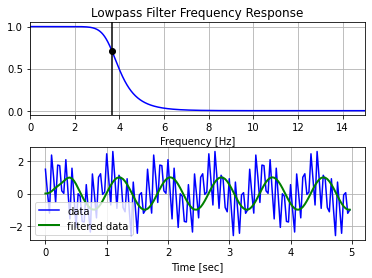

In [24]:
# source

import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [ ]:
# Packages reqd: pydub, ffmpeg

# pydub - pip install pydub

# ffmpeg: 
# sudo add-apt-repository ppa:kirillshkrogalev/ffmpeg-next
# sudo apt-get update
# sudo apt-get install ffmpeg

## Load the m4a files (in M4a_files.tar.gz) 

!tar -xvzf M4a_files.tar.gz

## Delete unwanted files (here: Tapping files)

!find M4a_files/ -name 'tapping_results.*' -delete

## Converting to wav
# Using pydub

# Convert all file extensions to m4a (if required)

import os,sys
folder = 'M4a_files/'
for filename in os.listdir(folder):
       infilename = os.path.join(folder,filename)
       if not os.path.isfile(infilename): continue
       oldbase = os.path.splitext(filename)
       newname = infilename.replace('.tmp', '.m4a')
       output = os.rename(infilename, newname)


      
# Convert m4a extension files to wav extension files
      
import os
import argparse

from pydub import AudioSegment

formats_to_convert = ['.m4a']

for (dirpath, dirnames, filenames) in os.walk("M4a_files/"):
    for filename in filenames:
        if filename.endswith(tuple(formats_to_convert)):

            filepath = dirpath + '/' + filename
            (path, file_extension) = os.path.splitext(filepath)
            file_extension_final = file_extension.replace('.', '')
            try:
                track = AudioSegment.from_file(filepath,
                        file_extension_final)
                wav_filename = filename.replace(file_extension_final, 'wav')
                wav_path = dirpath + '/' + wav_filename
                print('CONVERTING: ' + str(filepath))
                file_handle = track.export(wav_path, format='wav')
                os.remove(filepath)
            except:
                print("ERROR CONVERTING " + str(filepath))

# Rename folder M4a_files as wav_files
!mv M4a_files wav_files

## 6. Pyloudnorm

http://en.wikipedia.org/wiki/Loudness

In [18]:
!pip install pyloudnorm

In [42]:
# Create a 100Hz sine wave, sampled at 44100Hz. Write to 16-bit PCM, Mono.
import numpy as np
from scipy.io.wavfile import write
samplerate = 44100; fs = 1000
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
write("example.wav", samplerate, data.astype(np.int16))

In [43]:
from IPython import display
display.Audio('example.wav')

In [19]:
import glob
my_wavs = glob.glob('*.wav')
print(my_wavs)

['11k16bitpcm.wav', 'claxon_1m.wav', 'claxon_close.wav', 'claxon_freesound.wav', 'claxon_iphone.wav', 'claxon_michiel.wav', 'example.wav', 'loudness.wav', 'my_test.wav', 'my_wav.wav', 'noise_add.wav', 'out.wav', 'output.wav', 'robot0.wav', 'robot1.wav', 'robot2.wav', 'robot3.wav', 'silence.wav', 'test.wav', 'test2.wav', 'test3.wav']


In [28]:
# source: https://reposhub.com/python/miscellaneous/csteinmetz1-pyloudnorm.html
import soundfile as sf
import pyloudnorm as pyln

for i in range (len(my_wavs)):
    data, rate = sf.read(my_wavs[i]) # load audio (with shape (samples, channels))
    meter = pyln.Meter(rate) # create BS.1770 meter
    loudness = meter.integrated_loudness(data) # measure loudness
    print(my_wavs[i], loudness)

11k16bitpcm.wav -15.73188981784454
claxon_1m.wav -41.5771305341099
claxon_close.wav -26.62934857969829
claxon_freesound.wav -26.020539021696802
claxon_iphone.wav -24.112056777410313
claxon_michiel.wav -9.510478324582824
example.wav 0.29707727466599765
loudness.wav -32.296214656528164
my_test.wav -22.059049150972417
my_wav.wav -64.77835289477656
noise_add.wav -40.38583051955908
out.wav -23.41677606498686
output.wav -40.538907561177886
robot0.wav -20.650504718484125
robot1.wav -17.14473768900207
robot2.wav -20.379183351689232
robot3.wav -20.2296895188484
silence.wav -47.03014224718328
test.wav -49.423584330672085
test2.wav -36.82204260017528
test3.wav -29.502831895824762


### 6b. Recording wav and analysing with pyloudnorm

In [12]:
from datetime import datetime
import sounddevice as sd
from scipy.io.wavfile import write
import soundfile as sf
import pyloudnorm as pyln

#settings
fs = 16000  # Sample rate
seconds = 1 # Duration of recording
now=datetime.now()
#creating a file
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('loudness.wav', fs, myrecording)  # Save as WAV file 
#calculate loudness
data, rate = sf.read('loudness.wav') # load audio (with shape (samples, channels))
meter = pyln.Meter(rate) # create BS.1770 meter
loudness = meter.integrated_loudness(data) # measure loudness
print(now, loudness)

2021-12-17 08:36:42.706758 -28.03249508364635


In [13]:
for i in range(0,10):
    now=datetime.now()
    #creating a file
    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
    sd.wait()  # Wait until recording is finished
    write('loudness.wav', fs, myrecording)  # Save as WAV file 
    #calculate loudness
    data, rate = sf.read('loudness.wav') # load audio (with shape (samples, channels))
    meter = pyln.Meter(rate) # create BS.1770 meter
    loudness = meter.integrated_loudness(data) # measure loudness
    print(now, loudness)

2021-12-17 08:36:47.685972 -47.23563504486353
2021-12-17 08:36:49.099318 -55.632671780375745
2021-12-17 08:36:50.470146 -29.500904113092037
2021-12-17 08:36:51.831177 -30.861291794080454
2021-12-17 08:36:53.186854 -35.73412144506805
2021-12-17 08:36:54.513003 -36.04978246159876
2021-12-17 08:36:55.856118 -30.37560156774125
2021-12-17 08:36:57.230181 -30.422161883587076
2021-12-17 08:36:58.609183 -27.05289850150062
2021-12-17 08:36:59.993899 -32.296214656528164
